In [2]:
import sys
sys.path.append('../..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from simple_skip_gram import SimpleSkipGram
from common.util import preprocess, create_contexts_target, convert_one_hot

## Simple CBOW

| epoch 1 |  itr 1/2 | time 0.07925677299499512[s] | loss 1.9459364414035003
| epoch 101 |  itr 1/2 | time 0.20771002769470215[s] | loss 1.6938292195361602
| epoch 201 |  itr 1/2 | time 0.35834479331970215[s] | loss 1.375456718389192
| epoch 301 |  itr 1/2 | time 0.659106969833374[s] | loss 0.9727679705266511
| epoch 401 |  itr 1/2 | time 0.9581077098846436[s] | loss 0.8898309352154095
| epoch 501 |  itr 1/2 | time 1.3135128021240234[s] | loss 0.8277204044930349
| epoch 601 |  itr 1/2 | time 1.4941635131835938[s] | loss 1.0176545381767794
| epoch 701 |  itr 1/2 | time 1.9224495887756348[s] | loss 0.971777875670311
| epoch 801 |  itr 1/2 | time 2.177062511444092[s] | loss 0.6000300960417653
| epoch 901 |  itr 1/2 | time 2.4583725929260254[s] | loss 0.7429580296201608


findfont: Font family ['D2Coding ligature'] not found. Falling back to DejaVu Sans.


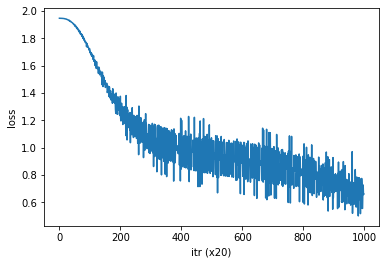

you [-1.0762557  1.06351   -1.1074004  1.1025865 -1.5765114]
say [ 1.1755433 -1.1957825  1.1767687 -1.1574136  1.088242 ]
goodbye [-0.9526097   0.96037304 -0.86772525  0.9271136  -0.14380391]
and [ 0.6333946  -0.4580956   0.8180077  -0.80556715  1.8256714 ]
i [-0.9568056   0.941875   -0.8830476   0.92261046 -0.1562804 ]
hello [-1.062895   1.0663131 -1.1106303  1.0801047 -1.561029 ]
. [ 1.3913976 -1.4761357  1.2531542 -1.2582308 -0.9183479]


In [3]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size, epoch_print = 100)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

## Simple skip-gram

| epoch 1 |  itr 1/2 | time 0.0009965896606445312[s] | loss 3.891985450940725
| epoch 101 |  itr 1/2 | time 0.04792666435241699[s] | loss 3.376762516563271
| epoch 201 |  itr 1/2 | time 0.08882880210876465[s] | loss 2.903410380190744
| epoch 301 |  itr 1/2 | time 0.13170862197875977[s] | loss 2.539963111112498
| epoch 401 |  itr 1/2 | time 0.17260098457336426[s] | loss 2.3946500729923788
| epoch 501 |  itr 1/2 | time 0.2154843807220459[s] | loss 2.3349027239601954
| epoch 601 |  itr 1/2 | time 0.25737547874450684[s] | loss 2.3174969079156775
| epoch 701 |  itr 1/2 | time 0.300217866897583[s] | loss 2.3435649489001107
| epoch 801 |  itr 1/2 | time 0.34114742279052734[s] | loss 2.0715315931505476
| epoch 901 |  itr 1/2 | time 0.3830409049987793[s] | loss 1.788378172657013


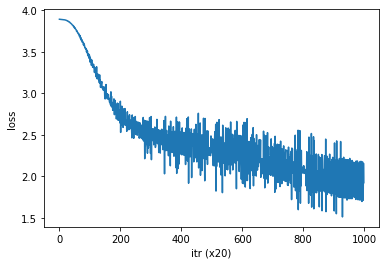

you [ 0.00152862  0.00943199  0.00498039 -0.01105605 -0.0090797 ]
say [ 0.40928003  0.9681609  -0.60750085  0.29873264  0.7500545 ]
goodbye [-0.6842289  -0.80604213  0.869326    1.2251657  -0.75968397]
and [ 1.1537582  0.9375379 -1.0481284 -1.3354286  1.0159786]
i [-0.66723204 -0.8001625   0.89004374  1.2151715  -0.761566  ]
hello [-1.1618923  -0.8838123   0.34882295 -0.72758615 -0.9388194 ]
. [-0.00162247  0.00803852 -0.00782559 -0.01251176  0.00806981]


In [5]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size, epoch_print = 100)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])